In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import pickle
import os

In [190]:
# save_dir_nocl = 'results-pre-overtraining/nocl-seed0'
# save_dir_proj = 'results-pre-overtraining/proj-seed0'
# 
# save_dir_nocl = 'results-pre-overtraining/nocl-seed1'
# save_dir_proj = 'results-pre-overtraining/proj-seed1'

# saved every 25 instead of every 10
# save_dir_nocl = '2023-08-01T17:43:58_plain'
# save_dir_proj = '2023-08-01T17:44:08_proj'

save_dir_nocl = '2023-08-01T23:39:47_plain-overtrain500'
save_dir_proj = '2023-08-01T23:41:14_proj-overtrain500'

# save_dir_nocl = '2023-07-31T19:40:49_nocl-overtrain1000'
# save_dir_proj = '2023-07-31T19:40:59_proj-overtrain1000'


In [191]:
# Get convergence numbers

conv_plain_f = os.path.join('data', save_dir_nocl, 'conv.txt')
conv_cl_f = os.path.join('data', save_dir_proj, 'conv.txt')

conv_plain = np.loadtxt(conv_plain_f)
conv_cl = np.loadtxt(conv_cl_f)

In [192]:
perfs_nocl_f = os.path.join('data', save_dir_nocl, 'perfs', '30.pkl')
perfs_proj_f = os.path.join('data', save_dir_proj, 'perfs', '30.pkl')

with open(perfs_nocl_f,'rb') as fp:
    perfs_plain = pickle.load(fp)

with open(perfs_proj_f,'rb') as fp:
    perfs_cl = pickle.load(fp)

In [193]:
addition = np.arange(50, 50*(len(conv_plain)+1), 50)
conv_plain_cumsum = np.cumsum(conv_plain)
conv_plain_added = conv_plain_cumsum + addition

addition = np.arange(50, 50*(len(conv_cl)+1), 50)
conv_cl_cumsum = np.cumsum(conv_cl)
conv_cl_added = conv_cl_cumsum + addition

# conv_plain_added = np.cumsum(conv_plain)
# conv_cl_added = np.cumsum(conv_cl)

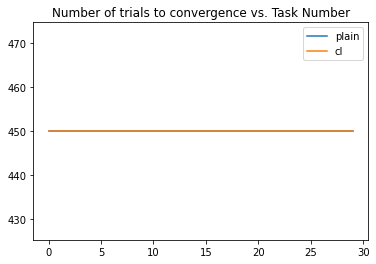

In [194]:
plt.figure(facecolor='white')
plt.plot(conv_plain, label='plain')
plt.plot(conv_cl, label='cl')
plt.legend()
plt.title("Number of trials to convergence vs. Task Number")

# if not os.path.exists(os.path.join('analysis', save_dir_nocl, 'imgs')):
#     os.makedirs(os.path.join('analysis', save_dir_nocl, 'imgs'))
# if not os.path.exists(os.path.join('analysis', save_dir_proj, 'imgs')):
#     os.makedirs(os.path.join('analysis', save_dir_proj, 'imgs'))

# plt.savefig(os.path.join('analysis', save_dir, 'imgs', f"conv-comparison_seed{seed}.png"))

plt.show()

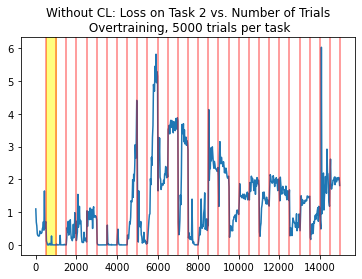

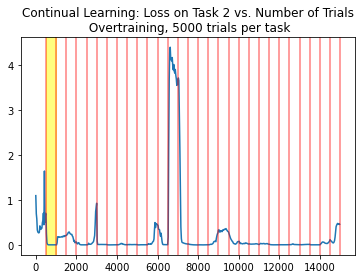

In [198]:
# k = 13
k = 1

plt.figure(facecolor='white')
plt.plot(perfs_plain['trials'], list(map(lambda x: np.mean(x), perfs_plain[k])), label='plain')
for index in conv_plain_added:
    plt.axvline(x=index, color='r', alpha=0.5)
lowerbd = conv_plain_added[k-1] if k > 0 else 0
plt.axvspan(lowerbd, conv_plain_added[k], color='yellow', alpha=0.5)
# plt.ylim(0, 6)
plt.title(f"Without CL: Loss on Task {k+1} vs. Number of Trials\n Overtraining, 5000 trials per task")
# plt.savefig(os.path.join('data', save_dir, 'imgs', f"no-cl_task{k+1}_seed{seed}.png"))
plt.show()

plt.figure(facecolor='white')
plt.plot(perfs_cl['trials'], list(map(lambda x: np.mean(x), perfs_cl[k])), label='cl')
for index in conv_cl_added:
    plt.axvline(x=index, color='r', alpha=0.5)
lowerbd = conv_cl_added[k-1] if k > 0 else 0
plt.axvspan(lowerbd, conv_cl_added[k], color='yellow', alpha=0.5)
# plt.ylim(0, 6)
plt.title(f"Continual Learning: Loss on Task {k+1} vs. Number of Trials\n Overtraining, 5000 trials per task")
# plt.savefig(os.path.join('data', save_dir, 'imgs', f"cl_task{k+1}_seed{seed}.png"))
plt.show()

In [76]:
# for k in range(30):
#     plt.figure()
#     plt.plot(plain['trials'], list(map(lambda x: np.mean(x), plain[k])), label='plain')
#     plt.plot(cl['trials'], list(map(lambda x: np.mean(x), cl[k])), label='cl')
#     plt.legend()